Problem Statement :
The dataset includes daily temperature records from multiple weather stations. We focus on analyzing temperature trends over a specific period (2005-2014) and identify any records broken in 2015.


Loading the Datasets

In [2]:

import pandas as pd

# Load Temperature dataset
temperature_df = pd.read_csv('temperature.csv')

# Inspect the datasets
print(temperature_df.head())
print("\n")
print(temperature_df.info())



            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB
None


In [5]:
#load binsize dataset
binsize_df = pd.read_csv('BinSize.csv')

print(binsize_df.head())
print(binsize_df.info())

            ID  LATITUDE  LONGITUDE  ELEVATION STATE                 NAME  \
0  AE000041196    25.333     55.517       34.0   NaN  SHARJAH INTER. AIRP   
1  AEM00041194    25.255     55.364       10.4   NaN           DUBAI INTL   
2  AEM00041217    24.433     54.651       26.8   NaN       ABU DHABI INTL   
3  AEM00041218    24.262     55.609      264.9   NaN          AL AIN INTL   
4  AFM00040990    31.500     65.850     1010.0   NaN     KANDAHAR AIRPORT   

  GSNFLAG HCNFLAG    WMOID             x             y  \
0     GSN     NaN  41196.0  5.579578e+06  2.816905e+06   
1     NaN     NaN  41194.0  5.567782e+06  2.808232e+06   
2     NaN     NaN  41217.0  5.532707e+06  2.716829e+06   
3     NaN     NaN  41218.0  5.637301e+06  2.697815e+06   
4     NaN     NaN  40990.0  6.243199e+06  3.502645e+06   

                                  x_group  \
0  5497601.479782179 to 5594934.908498545   
1  5497601.479782179 to 5594934.908498545   
2  5497601.479782179 to 5594934.908498545   
3   5594

#1) python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

To understand the temperature trends over a decade, we calculate the record high (maximum temperature) and record low (minimum temperature) for each day of the year.


In [7]:
#1)Filter Data for the Years 2005-2014
import pandas as pd


# Convert the 'date' column to datetime format :allows us to easy extraction of parts of the date (e.g., day, month, year)
#We need to extract the day of the year (e.g., January 1st, February 3rd) from the date, to group the data and calculate record highs and lows.
# Also Datetime format automatically handles for leap years since we have to Watch out for leap days (i.e. February 29th)

temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])

# add new column year and filter out years between 2005-2014
temperature_df['year'] = temperature_df['Date'].dt.year

filtered_df = temperature_df[(temperature_df['year'] >= 2005) & (temperature_df['year'] <= 2014)]
print(filtered_df.head())


            ID       Date Element  Data_Value  year
0  USW00094889 2014-11-12    TMAX          22  2014
1  USC00208972 2009-04-29    TMIN          56  2009
2  USC00200032 2008-05-26    TMAX         278  2008
3  USC00205563 2005-11-11    TMAX         139  2005
4  USC00200230 2014-02-27    TMAX        -106  2014


In [26]:
# Extract day of the year and remove February 29th (leap day)
#strftime('%m-%d'): Converts the datetime object to a string in the format "MM-DD"

# Extract day of the year and remove February 29th (leap day)
filtered_df = filtered_df.copy()
filtered_df.loc[:, 'Day_of_Year'] = filtered_df['Date'].dt.strftime('%m-%d')

# Filter out February 29th
filtered_df = filtered_df[filtered_df['Day_of_Year'] != '02-29']

print(filtered_df.head())



            ID       Date Element  Data_Value  year Day_of_Year
0  USW00094889 2014-11-12    TMAX          22  2014       11-12
1  USC00208972 2009-04-29    TMIN          56  2009       04-29
2  USC00200032 2008-05-26    TMAX         278  2008       05-26
3  USC00205563 2005-11-11    TMAX         139  2005       11-11
4  USC00200230 2014-02-27    TMAX        -106  2014       02-27


In [27]:
# Calculate the record highs and lows for each day of the year
record_highs = filtered_df[filtered_df['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
record_lows = filtered_df[filtered_df['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()


 Find Broken Records in 2015

In [32]:
# Filter the data for the year 2015
data_2015 = temperature_df[temperature_df['year'] == 2015].copy()

# Extract day of the year and remove February 29th (leap day)
data_2015.loc[:, 'Day_of_Year'] = data_2015['Date'].dt.strftime('%m-%d')
data_2015 = data_2015[data_2015['Day_of_Year'] != '02-29']

# Find where 2015 data breaks the records
broken_highs_2015 = data_2015[(data_2015['Element'] == 'TMAX') &
                              (data_2015['Data_Value'] > data_2015['Day_of_Year'].map(record_highs))]
broken_lows_2015 = data_2015[(data_2015['Element'] == 'TMIN') &
                             (data_2015['Data_Value'] < data_2015['Day_of_Year'].map(record_lows))]
broken_lows_2015

,ID,Date,Element,Data_Value,year,Day_of_Year
8630,USW00094889,2015-08-28,TMIN,56,2015,08-28
17096,USW00014833,2015-01-05,TMIN,-155,2015,01-05
17755,USW00094889,2015-10-17,TMIN,-55,2015,10-17
25929,USC00207308,2015-10-20,TMIN,-39,2015,10-20
26455,USC00208202,2015-03-28,TMIN,-122,2015,03-28
...,...,...,...,...,...,...
163492,USC00202308,2015-02-16,TMIN,-244,2015,02-16
163641,USC00208080,2015-02-16,TMIN,-250,2015,02-16
163906,USC00207312,2015-02-23,TMIN,-233,2015,02-23
164439,USC00205563,2015-02-16,TMIN,-244,2015,02-16


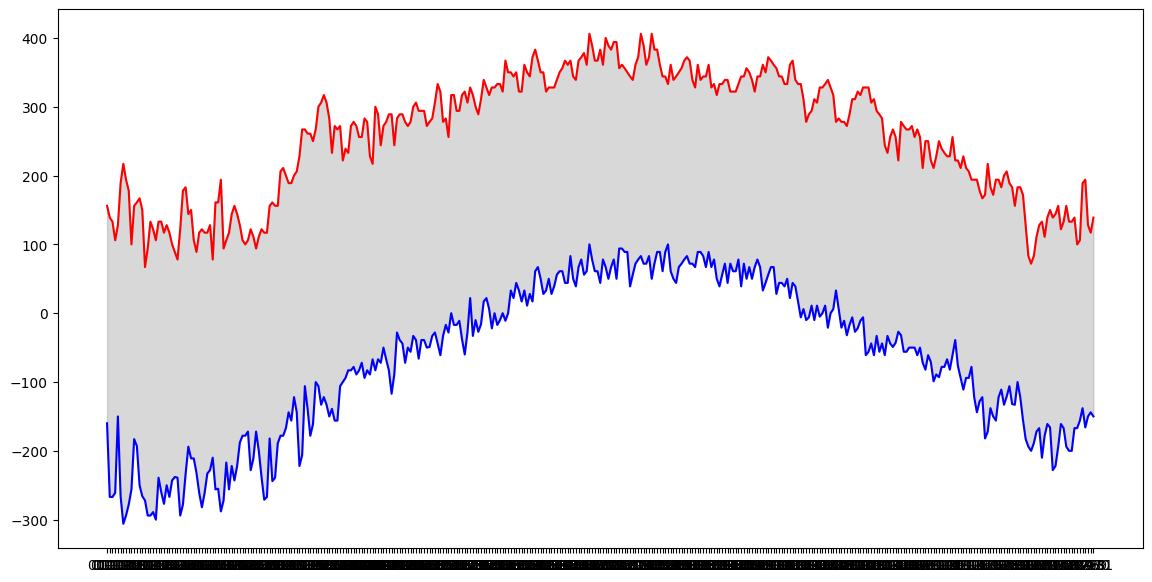

In [33]:
import matplotlib.pyplot as plt


# Plot the record highs and lows with shaded area in between
plt.figure(figsize=(14, 7))
plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='blue')
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='gray', alpha=0.3)



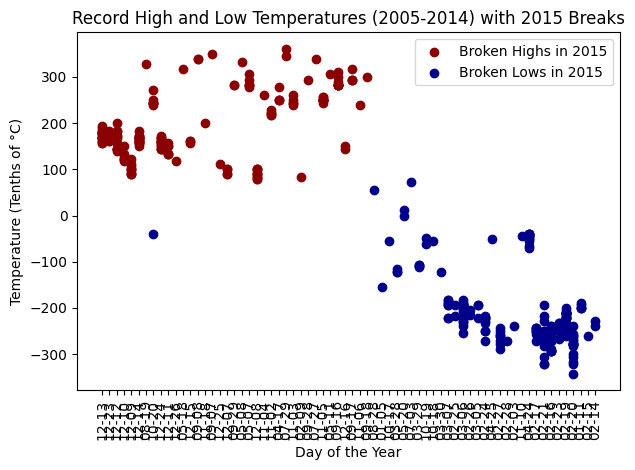

In [34]:
# Overlay scatter plot for broken records in 2015
plt.scatter(broken_highs_2015['Day_of_Year'], broken_highs_2015['Data_Value'], color='darkred', label='Broken Highs in 2015')
plt.scatter(broken_lows_2015['Day_of_Year'], broken_lows_2015['Data_Value'], color='darkblue', label='Broken Lows in 2015')
# Formatting the plot
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of °C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Breaks')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [25]:

# Map visualization
import folium

# Load the station data
bin_data = pd.read_csv('BinSize.csv')

# Create a map centered around Ann Arbor, Michigan
m = folium.Map(location=[42.2808, -83.7430], zoom_start=10)
m


In [23]:
# Add stations to the map
for _, row in bin_data.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']],
                  popup=row['ID']).add_to(m)

# Save the map as an HTML file
m.save('ann_arbor_stations_map.html')

#Use of Additional Modules:
matplotlib: A widely used library for creating static, animated, and interactive visualizations in Python. It is chosen for its flexibility and control over plot aesthetics, which are crucial for clearly presenting temperature trends and anomalies.


pandas: An essential tool for data manipulation and analysis in Python, pandas is used for its powerful data structures (like DataFrames) that simplify data filtering, grouping, and processing.


folium:used to create interactive maps that can be easily customized and integrated with other data analysis results. folium is particularly useful for geographic data visualization, making it ideal for mapping weather stations.